<a href="https://colab.research.google.com/github/Rdcornejov/Data-Mining-Data-Analysis/blob/main/PC2_Cornejo_Valencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3 align="center"><b>PC2:</b> CC241 Data Mining & Data Analysis </h3>
<h3 align="center">2024-2</h3>




---


**Apellidos y Nombres del Alumno:**  Cornejo Valencia, Ronaldo David

**Código:**  u201816502


---



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [14]:
data = pd.read_csv('bupa.csv',sep=";")
data.head()

,V1,V2,V3,V4,V5,V6,V7
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2


#### a. **Para las variables V2 y V3 realizar un análisis de identificación y tratamiento de valores faltantes. Comentar las principales conclusiones. (5 puntos)**

Luego de visualizar, vemos que no hay valores faltantes en las variables V2 o V3, por la cual no se hará un tratamiento de valores faltantes

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      345 non-null    int64  
 1   V2      345 non-null    int64  
 2   V3      345 non-null    int64  
 3   V4      345 non-null    int64  
 4   V5      345 non-null    int64  
 5   V6      345 non-null    float64
 6   V7      345 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 19.0 KB


In [16]:
# Valores Faltantes
data.isnull().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0


#### b. **Para las variables V5 y V6, realizar un análisis de identificación y tratamiento de valores atípicos. Comentar las principales conclusiones. (5 puntos)**

In [18]:
muestra = data[["V5","V6"]]

In [19]:
muestra.head(5)

,V5,V6
0,31,0.0
1,23,0.0
2,54,0.0
3,36,0.0
4,10,0.0


Primero revisamos si las variables se acercan a una distribucion normal. Hacemos la prueba de normalidad

In [21]:
stats.shapiro(muestra.V5)

ShapiroResult(statistic=0.6839380588671681, pvalue=6.48073466081761e-25)

In [27]:
stats.shapiro(muestra.V5)[1] < 5

True

In [22]:
stats.shapiro(muestra.V6)

ShapiroResult(statistic=0.8354936513596574, pvalue=1.6864816314857383e-18)

In [25]:
stats.shapiro(muestra.V6)[1] < 5

True

Luego de revisar ambas variables, visualizamos que su pvalue son menores a 5, Se rechaza la Ho, a un nivel de confianza de 95%, las variables no se aproximan a una distribución normal

Asi que utilizamos para variables que no se aproximan a una distribucion normal

Comenzamos con V5

In [28]:
#Encontrando RIC
percentile25 = muestra['V5'].quantile(0.25) #cuartil 1
percentile75 = muestra['V5'].quantile(0.75) #cuartil 3
ric = percentile75 - percentile25

In [31]:
#Limitación de valores atípicos
upper_limitV5 = percentile75 + 1.5 * ric
lower_limitV5 = percentile25 - 1.5 * ric

print(upper_limitV5, lower_limitV5)

92.5 -31.5


Encontramos que tiene bastantes valores atípicos

In [33]:
#Encontrando los valores atípicos
muestra[(muestra['V5'] > upper_limitV5) | (muestra['V5'] < lower_limitV5)]

,V5,V6
24,97,0.5
76,156,2.0
84,297,2.0
97,104,3.0
114,169,4.0
132,107,5.0
133,150,5.0
138,112,5.0
167,120,7.0
174,114,8.0


<ipython-input-34-b8abaf1d350d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=muestra["V5"], orient="v", palette="Set2")


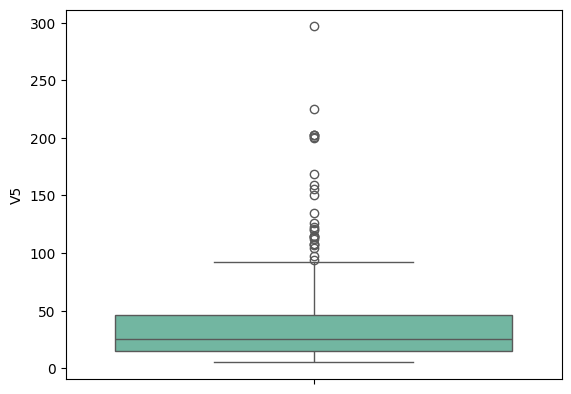

In [34]:
sns.boxplot(data=muestra["V5"], orient="v", palette="Set2")
plt.show()

In [35]:
#Recorte de valores atípicos
new_muestra = muestra[(muestra['V5'] < upper_limitV5) & (muestra['V5'] > lower_limitV5)]
new_muestra.shape

(318, 2)

Verificamos el impacto

In [36]:
new_muestra.shape[0]/muestra.shape[0]*100

92.17391304347827

Reemplazamos los valores atipicos con los limites

In [37]:
#Aplicación de los límites
new_df_cap = muestra.copy()
new_df_cap['V5'] = np.where(
    new_df_cap['V5']>upper_limitV5,
    upper_limitV5,
    np.where(
        new_df_cap['V5']<lower_limitV5,
        lower_limitV5,
        new_df_cap['V5']
    )
)

In [39]:
#Encontrando los valores atípicos
new_df_cap[(new_df_cap['V5'] > upper_limitV5) | (new_df_cap['V5'] < lower_limitV5)]

,V5,V6


Como hemos reemplazado, no ha tenido impacto

In [40]:
new_df_cap.shape[0]/muestra.shape[0]*100

100.0

Ahora hacemos lo mismo con V6

In [41]:
#Encontrando RIC
percentile25_v6 = muestra['V6'].quantile(0.25) #cuartil 1
percentile75_v6 = muestra['V6'].quantile(0.75) #cuartil 3
ric_v6 = percentile75_v6 - percentile25_v6

In [50]:
#Limitación de valores atípicos
upper_limitV6 = percentile75_v6 + 1.5 * ric_v6
lower_limitV6 = percentile25_v6 - 1.5 * ric_v6

print(upper_limitV6, lower_limitV6)

14.25 -7.75


Encontramos 5 valores atípicos

In [51]:
#Encontrando los valores atípicos
muestra[(muestra['V6'] > upper_limitV6) | (muestra['V6'] < lower_limitV6)]

,V5,V6
188,108,16.0
189,201,20.0
342,89,15.0
343,14,16.0
344,65,20.0


<ipython-input-52-98dba4e7ca56>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=muestra["V6"], orient="v", palette="Set2")


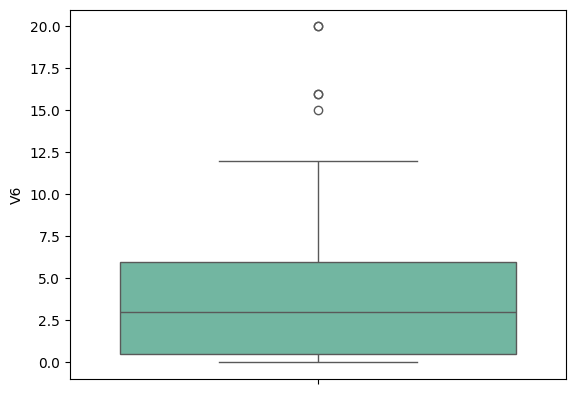

In [52]:
sns.boxplot(data=muestra["V6"], orient="v", palette="Set2")
plt.show()

In [53]:
#Recorte de valores atípicos
new_muestra_V6 = muestra[(muestra['V6'] < upper_limitV6) & (muestra['V6'] > lower_limitV6)]
new_muestra_V6.shape

(340, 2)

In [54]:
new_muestra_V6.shape[0]/muestra.shape[0]*100

98.55072463768117

Reemplazamos por los limites de V6

In [55]:
#Aplicación de los límites
new_df_cap['V6'] = np.where(
    new_df_cap['V6']>upper_limitV6,
    upper_limitV6,
    np.where(
        new_df_cap['V6']<lower_limitV6,
        lower_limitV6,
        new_df_cap['V6']
    )
)

Verificamos si despues de reemplazar aun quedan valores atipicos

In [57]:
new_df_cap[(new_df_cap['V6'] > upper_limitV6) | (new_df_cap['V6'] < lower_limitV6)]

,V5,V6


In [58]:
new_df_cap.shape[0]/muestra.shape[0]*100

100.0

Luego, según los gráficos, logramos visualizar que ya no hay valores atípicos y tambien vemos como se aproxima un poco más a una distribucion normal

<ipython-input-59-ebfd7d0e87aa>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['V5'])
<ipython-input-59-ebfd7d0e87aa>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['V5'])


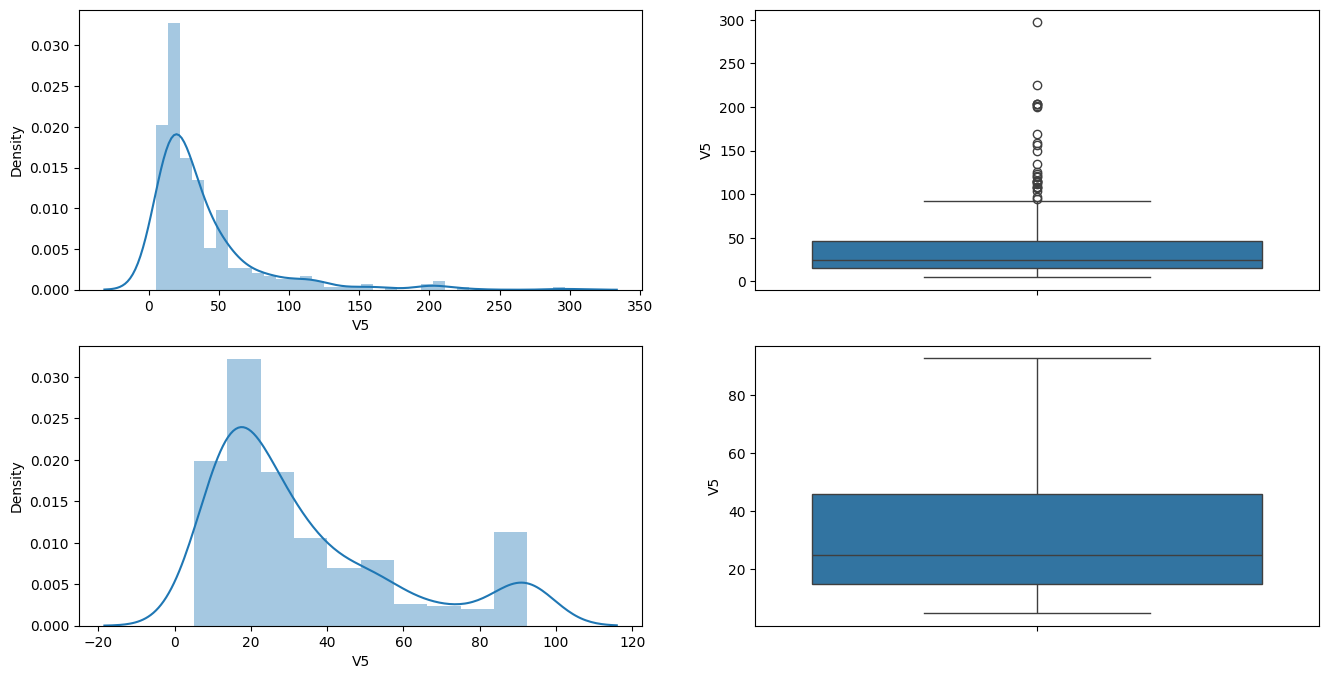

In [59]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['V5'])
plt.subplot(2,2,2)
sns.boxplot(data['V5'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['V5'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['V5'])
plt.show()

<ipython-input-60-dd5da0c92fb0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['V6'])
<ipython-input-60-dd5da0c92fb0>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['V6'])


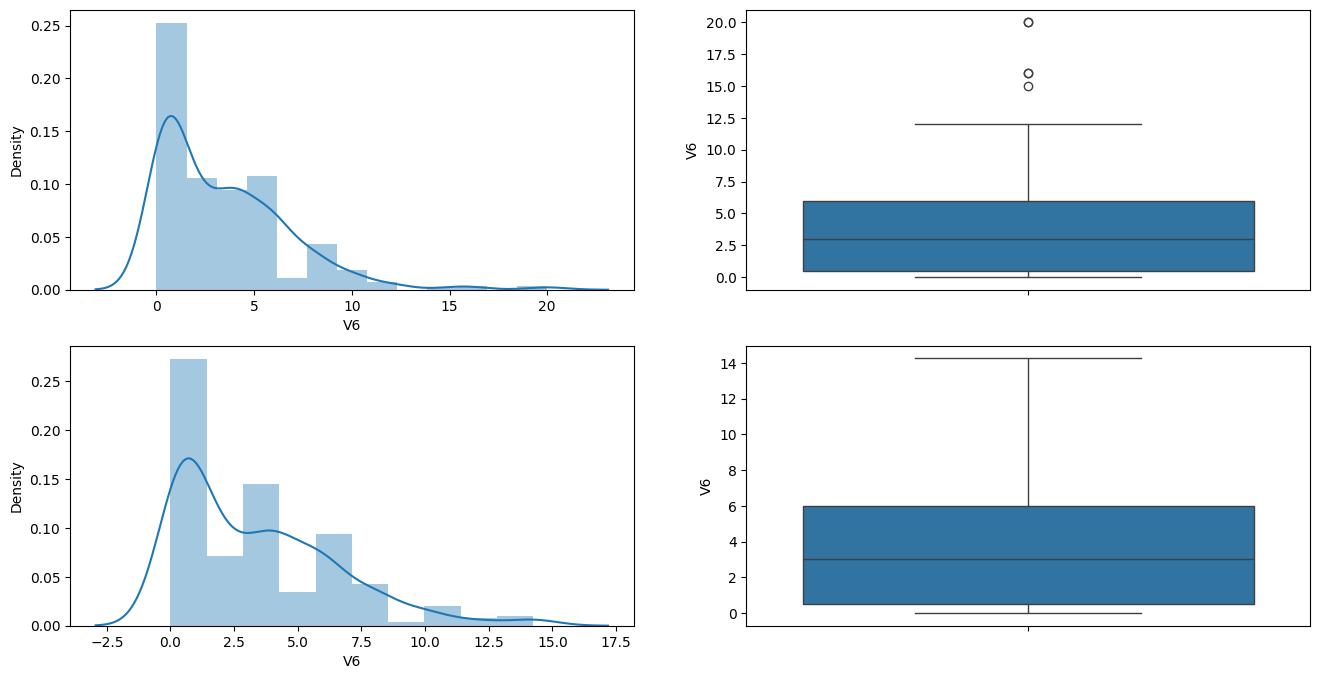

In [60]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['V6'])
plt.subplot(2,2,2)
sns.boxplot(data['V6'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['V6'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['V6'])
plt.show()